Link to github: https://github.com/albert-moller/CSSAssignment2.git

Group members: Albert Frisch Møller (s214610) and Mark Andrawes (s214654)

For this assignment each group member contributed equally to every aspect of the assignment

### Assignment 2

#### Part 1: Properties of the real-world network of Computational Social Scientists

##### Random Network

In [1]:
import networkx as nx
import json

with open('social_scientists_network.json', 'r') as f:
    data = json.load(f)

G_real = nx.node_link_graph(data)
node_count_real = G_real.number_of_nodes()
edge_count_real = G_real.number_of_edges()

#Calculate p using the formula p = 2*<L>/(N*(N-1)) obtained by isolating for p in equation 3.2 from Chapter 3

p = 2 * edge_count_real / (node_count_real*(node_count_real-1))
print(f"Probability p is {p}")

#Calculate the average degree using the formula <k> = p*(N-1) (equation 3.3 from Chapter 3)

average_degree = p*(node_count_real-1)
print(f"Average degree <k> is {average_degree}")

Probability p is 0.0005389648330011947
Average degree <k> is 7.650605804451958


The probability p was determined to be 0.000539. The average node degree was determined to be 7.65.

In [2]:
#Function to generate a Random Network using node count and probability p

import numpy as np
import netwulf as nw

def random_network(N, p):
    G = nx.Graph()
    G.add_nodes_from(range(N))
    for i in range(N):
        for j in range(i+1,N):
            if np.random.uniform(0,1) < p:
                G.add_edge(i,j)
    return G

G_random = random_network(node_count_real, p)

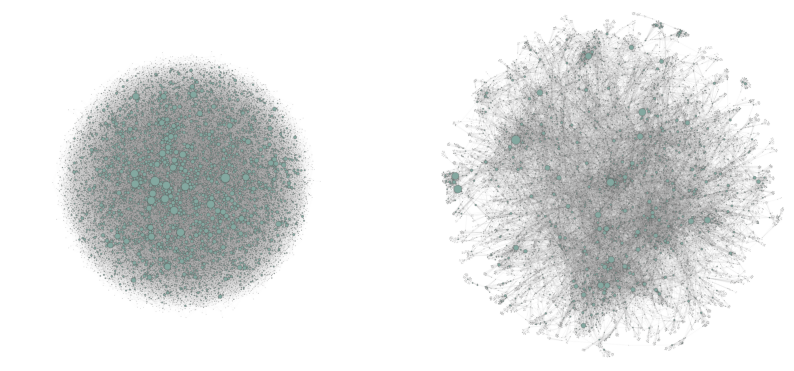

In [3]:
import matplotlib.pyplot as plt

connected_components = list(nx.connected_components(G_random))
largest_connected_component = max(connected_components, key = len)
largest_subgraph_random = G_random.subgraph(largest_connected_component)
#nw.visualize(largest_subgraph_random)

connected_components = list(nx.connected_components(G_real))
largest_connected_component = max(connected_components, key = len)
largest_subgraph_real = G_real.subgraph(largest_connected_component)
#nw.visualize(largest_subgraph_real)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_images_side_by_side(image_paths):
    plt.figure(figsize=(10, 5))
    for i, image_path in enumerate(image_paths, start=1):
        img = mpimg.imread(image_path)
        plt.subplot(1, len(image_paths), i)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

image_paths = ['random_network.png', 'real_network.png']
display_images_side_by_side(image_paths)


In [4]:
#Compute size of the largest connected component of random network.
print(f"Size of the largest connected component (random network) is {largest_subgraph_random.number_of_nodes()}")

#Compute size of the largest connected component of real network.
print(f"Size of the largest connected component (real network) is {largest_subgraph_real.number_of_nodes()}")

#Compute the number of isolated components for the random network
isolated_n = list(nx.isolates(G_random))
number_of_isolated_nodes = len(isolated_n)
print(f"Number of isolated nodes in the random network: {number_of_isolated_nodes}")

#Compute the number of isolated components for the real network
isolated_n = list(nx.isolates(G_real))
number_of_isolated_nodes = len(isolated_n)
print(f"Number of isolated nodes in the real network: {number_of_isolated_nodes}")

Size of the largest connected component (random network) is 14185
Size of the largest connected component (real network) is 13826
Number of isolated nodes in the random network: 11
Number of isolated nodes in the real network: 0


##### What regime does your random network fall into? Is it above or below the critical threshold?

As the average node degree of the random network is 7.65, which is significantly greater than 1, the random network falls into the supercritical regime. It is therefore above the critical threshold, which indicates the presence of a giant component.  

##### According to the textbook, what does the network's structure resemble in this regime?

In the supercritical regime, the random network has a giant connected component. The size of the largest connected component of the random network was determined to be 14188 and the random network has 8 isolated nodes. The random network's structure resembles that of a fully connected network with few isolated nodes. 

##### Based on your visualizations, identify the key differences between the actual and the random networks. Explain whether these differences are consistent with theoretical expectations.

The random network has less clustering and lacks community structure. Whereas the actual network has more distinct clustering and clear community structures. The random network also has a giant component with some isolated nodes, whereas the actual network is fully connected with no isolated nodes. These differences are consistent with theoretical expectations, as real networks are often characterised by having high clustering, community structures and the presence of hubs. Whereas a Erdős-Rényi random network model is unable to capture these characteristics. 

##### Degree distribution

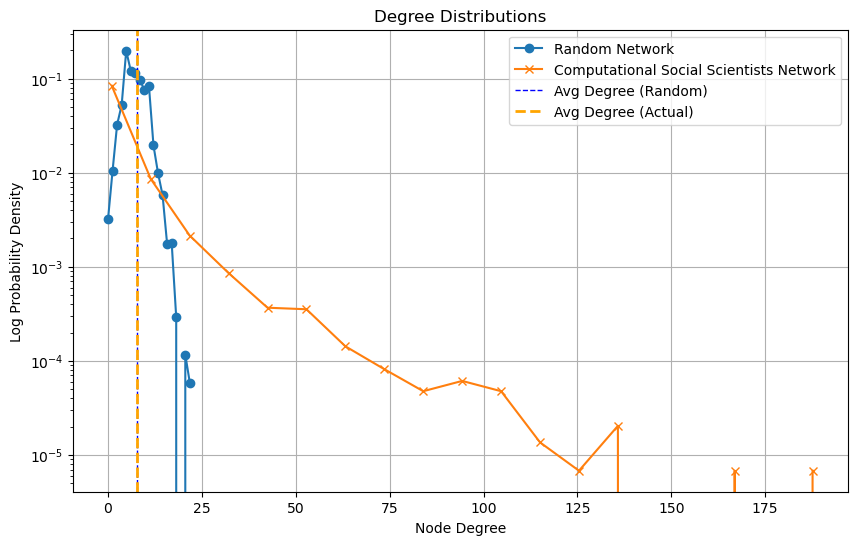

In [5]:
import matplotlib.pyplot as plt

#Compute degree distribution for the random network:
node_degrees_random = [degree for node, degree in G_random.degree()]
max_node_degree = max(node_degrees_random)
min_node_degree = min(node_degrees_random)
bins = np.linspace(min_node_degree, max_node_degree, 20)
degree_distribution_random, edges_random = np.histogram(node_degrees_random, bins=bins, density=True)

#Compute degree distribution for the real Computational Social Scientists network:
node_degrees_real = [degree for node, degree in G_real.degree()]
max_node_degree = max(node_degrees_real)
min_node_degree = min(node_degrees_real)
bins = np.linspace(min_node_degree, max_node_degree, 20)
degree_distribution_real, edges_real = np.histogram(node_degrees_real, bins=bins, density=True)

# Plot both degree distributions on the same figure using line plots
plt.figure(figsize=(10, 6))
plt.plot(edges_random[:-1], degree_distribution_random, linestyle='-', marker='o', label='Random Network')
plt.plot(edges_real[:-1], degree_distribution_real, linestyle='-', marker='x', label='Computational Social Scientists Network')
avg_degree_random = np.mean(node_degrees_random)
avg_degree_actual = np.mean(node_degrees_real)
plt.axvline(avg_degree_random, color='blue', linestyle='dashed', linewidth=1, label='Avg Degree (Random)')
plt.axvline(avg_degree_actual, color='orange', linestyle='dashed', linewidth=2, label='Avg Degree (Actual)')
plt.xlabel('Node Degree')
plt.ylabel('Log Probability Density')
#plt.xscale('log')
plt.yscale('log')
plt.title('Degree Distributions')
plt.legend()
plt.grid(True)

##### Does the average degree meaningfully represents the network's characteristics, especially in light of the insights gained from exploring heavy-tailed distributions? Discuss its adequacy or limitations in capturing the essence of the network's structural properties.

The average node degree of a network provides a simple connectivity measure. For networks with heavy tailed distributions, such as the CSS network, the average node is an inadequate measure for capturing the network's structural properties. This is because in these networks most nodes have a degree less than the average node degree, whereas a few nodes known as hubs have a node degree much greater. This means that the average degree can be misleading as it does not capture the presence of highly connected nodes nor the networks distribution spread. 

##### What differences can you observe between the real and the random distributions? How does the shape of the degree distribution for each network inform us about the network's properties? (max 150 words)

For the random network, the degree distribution appears to fall off quickly, indicating that many nodes have a node degree close to the average node degree. Therefore the fact that the random networks distribution is centralised around the mean, indicates that the network does not contain large hubs, instead it contains many equally connected nodes. For the real network, the degree distribution has a long tail, which is an indication of a heavy-tailed distribution such as the power law. The power law distribution implies that highly connected nodes (hubs) are present within the network, which is the case for real systems. 

#### Part 2 Network Analysis in Computational Social Science

##### Exercise 1: Mixing Patterns and Assortativity

##### Part 1: Assortativity Coefficient

In [6]:
def assortativity_coeffecient(G, attribute: str):
    attribute_dict = nx.get_node_attributes(G, attribute)
    assert len(attribute_dict) == G.number_of_nodes()
    attributes = list(set(attribute_dict.values()))
    attribute_indices = {attr: i for i, attr in enumerate(attributes)}
    e = np.zeros((len(attributes), len(attributes)))

    for a, b in G.edges():
        index_a = attribute_indices[attribute_dict[a]]
        index_b = attribute_indices[attribute_dict[b]]
        e[index_a][index_b] += 1
        e[index_b][index_a] += 1
    
    e = e / e.sum()
    a, b = e.sum(axis=1), e.sum(axis=0)
    r = (np.sum(np.diag(e)) - np.sum(a * b)) / (1 - np.sum(a * b))
    return r 
        
with open('social_scientists_network.json', 'r') as f:
    data = json.load(f)

G_real = nx.node_link_graph(data)

r = assortativity_coeffecient(G_real, "country")
print("Assortativity coefficient based on country:", round(r,3))

Assortativity coefficient based on country: 0.416


##### Part 2: Configuration model

In [7]:
import random
from tqdm import tqdm

def configuration_model(G, num_swaps):
    RG = G.copy()
    edges = list(RG.edges()) 
    edge_count = len(edges)
    for _ in range(num_swaps):
        e1_idx, e2_idx = random.sample(range(edge_count), 2)
        e1, e2 = edges[e1_idx], edges[e2_idx]
        u, v = e1
        x, y = e2

        if random.random() < 0.5:
            u, v = v, u

        if u != y and v != x and not RG.has_edge(u, y) and not RG.has_edge(x, v):
            RG.remove_edge(*e1)
            RG.remove_edge(*e2)
            RG.add_edge(u, y)
            RG.add_edge(x, v)
            edges[e1_idx] = (u, y)
            edges[e2_idx] = (x, v)

    return RG

num_swaps = G_real.number_of_edges() * 10
randomized_graph = configuration_model(G_real, num_swaps)

In [8]:
#Assert that the degrees of the nodes in the original
#network and the configuration model remain the same
original_degrees = dict(G_real.degree())
randomized_degrees = dict(randomized_graph.degree())
degrees_match = all(original_degrees[node] == randomized_degrees[node] for node in G_real.nodes())
print(f"Do the degrees match? {degrees_match}")

Do the degrees match? True


##### Part 3: Analyzing Assortativity in Random Networks

In [9]:
#Generate 100 random networks:
assortativity_coeffecients = []
num_swaps = G_real.number_of_edges() * 10

for _ in tqdm(range(100)):
    random_network = configuration_model(G_real, num_swaps)
    r = assortativity_coeffecient(random_network, "country")
    assortativity_coeffecients.append(r)

original_assortativity = assortativity_coeffecient(G_real, "country")
print(f"Assortativity coeffecient of the original network is {original_assortativity}")


100%|██████████| 100/100 [03:14<00:00,  1.95s/it]

Assortativity coeffecient of the original network is 0.41630238581031737


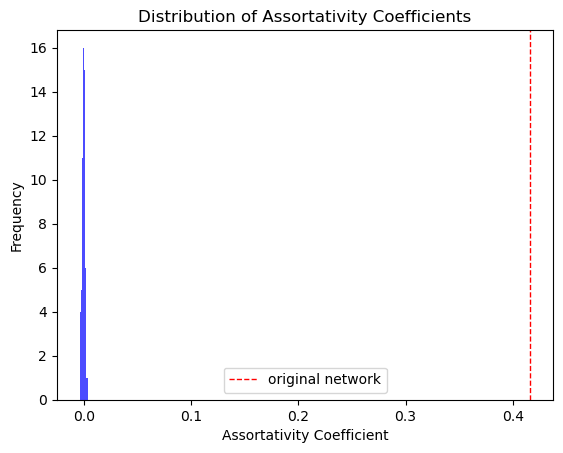

In [10]:
max_assortativity = max(assortativity_coeffecients)
min_assortativity = min(assortativity_coeffecients)
bins = np.linspace(min_assortativity, max_assortativity, 15)
plt.hist(assortativity_coeffecients, bins=bins, color='blue', alpha=0.7)
plt.axvline(original_assortativity, color='red', linestyle='dashed', linewidth=1, label = "original network")
plt.title('Distribution of Assortativity Coefficients')
plt.xlabel('Assortativity Coefficient')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### Compare the results with the assortativity of your original network to determine if connections within the same country are significantly higher than chance.

From the above plot showing the distribution of assortativity coeffecients for 100 random networks and the assortativity coeffecient of the original network, it is clear to see that connections within the same country are indeed significantly higher than chance. This is because the assortativity coeffecient of the original network is signifcantly larger than that of random networks. The large value namely 0.416, indicates that there is a high likelihood that any two nodes from the same country being connected.   

##### Part 4: Assortativity by Degree

In [11]:
def degree_assortativity(G):
    degrees = dict(G.degree())
    
    # Calculate the joint probability distribution of the degrees of the nodes on either side of an edge
    M = np.zeros((max(degrees.values())+1, max(degrees.values())+1))
    for u, v in G.edges():
        M[degrees[u]][degrees[v]] += 1
        M[degrees[v]][degrees[u]] += 1 

    # Normalize the matrix
    M /= M.sum()
    
    a_i = M.sum(axis=1)
    b_i = M.sum(axis=0)
    
    assortativity = (np.trace(M) - np.dot(a_i, b_i)) / (1 - np.dot(a_i, b_i))
    return assortativity

In [12]:
#Generate 100 random networks:
degree_assortativities = []
num_swaps = G_real.number_of_edges() * 10

for _ in tqdm(range(100)):
    random_network = configuration_model(G_real, num_swaps)
    degree_assort = degree_assortativity(random_network)
    degree_assortativities.append(degree_assort)

original_degree_assortativity= degree_assortativity(G_real)
print(f"Degree assortativity of the original network is {original_degree_assortativity}")


100%|██████████| 100/100 [03:20<00:00,  2.01s/it]

Degree assortativity of the original network is 0.08588712633921194


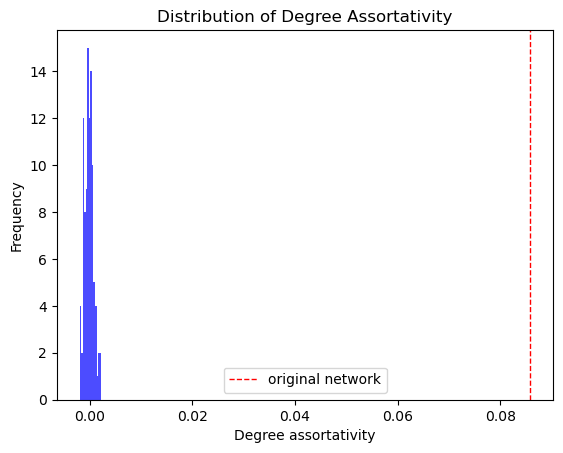

In [13]:
max_assortativity = max(degree_assortativities)
min_assortativity = min(degree_assortativities)
bins = np.linspace(min_assortativity, max_assortativity, 15)
plt.hist(degree_assortativities, bins=bins, color='blue', alpha=0.7)
plt.axvline(original_degree_assortativity, color='red', linestyle='dashed', linewidth=1, label = "original network")
plt.title('Distribution of Degree Assortativity')
plt.xlabel('Degree assortativity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### Analyze whether your network shows a tendency for high-degree scientists to connect with other high-degree scientists and vice versa.

As indicated by the red dashed line, the degree assortativity of the real computational social scientists network is much higher than the degree assortativity that would be expected by chance. This indicates that high-degree scientists are more likely to connect with other high-degree scientists, which is to be expected for the computational social scientists network.

##### Part 5: Reflection questions (max 250 words for the 3 questions)

##### Assortativity by degree. Were the results of the degree assortativity in line with your expectations? Why or why not?

The results of the degree assortativity were in line with our expectations. This is because it is common for researchers who actively publish to colloborate with other active researchers from the same country and field. This means that we generally see a social trend that popular likes to connect with popular. 

##### Edge flipping. In the process of implementing the configuration model, you were instructed to flip the edges (e.g., changing e_1 from (u,v) to (v,u)) 50% of the time. Why do you think this step is included?

The step involving edge flipping is essential as it ensures firstly that the network is undirected and secondly that the network does not inherent directionality nor bias from the original network. This is achieved by edge flipping.

##### Distribution of assortativity in random networks. Describe the distribution of degree assortativity values you observed for the random networks. Was the distribution pattern expected? Discuss how the nature of random network generation (specifically, the configuration model and edge flipping) might influence this distribution and whether it aligns with theoretical expectations.

The distribution of degree assortativity observed for the random networks appears to be concentrated around low assortativity values, close to zero. There is a clear peak in the distribution at degree assortativity values to zero. This distribution pattern is generally to be expected for random networks, due to the random connectivity where high-degree nodes are equally likely to connect to low-degree nodes as they are high-degree nodes. Also, it is attributed to the edge flipping, which reduces the assortativity as it eliminates directionality and inherent bias of the original network. Additionally, theoretically random networks do not have strong assortative mixing by node degree. This means that there is an equally probable chance of an edge forming between similiar degrees and dissimiliar degrees. Therefore, random networks are expected to have a degree assortativity close to zero, which has been observed. Lastly, due to the nature of the configuration model, structural properties of the original network are not taken into account. 

##### Exercise 2: Central nodes

In [14]:
closeness_centrality = nx.closeness_centrality(G_real)
top5_closeness_centralities = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 scientists by closeness centrality:")
for scientist, centrality in top5_closeness_centralities:
    print(f"Scientist {scientist}: {centrality}")

Top 5 scientists by closeness centrality:
Scientist https://openalex.org/A5034372799: 0.24477610967368213
Scientist https://openalex.org/A5067118505: 0.24400428112300943
Scientist https://openalex.org/A5021346979: 0.24296517811775784
Scientist https://openalex.org/A5007176508: 0.2410599441587279
Scientist https://openalex.org/A5071093940: 0.24095641089709924


##### What role do you imagine scientists with high closeness centrality play?

Given that closeness centrality measures how close a node is to all other nodes in the network, the 5 scientists with highest closeness centrality likely play a critical role in the field. These scientists likely collaborate with many others, and work within various subfield, acting as a bridge between them. As these scientists are closely connected to many others, this indicates that they are very influential, widely recognized and cited - we can imagine that they have produced foundational work which other scientists have built upon. 

In [15]:
eigenvector_centrality = nx.eigenvector_centrality(G_real)

# Sort and get the top 5
sorted_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("\nTop 5 scientists by eigenvector centrality:")
for scientist, centrality in sorted_eigenvector:
    print(f"Scientist {scientist}: {centrality}")


Top 5 scientists by eigenvector centrality:
Scientist https://openalex.org/A5046546654: 0.18545201328755917
Scientist https://openalex.org/A5031799782: 0.17511884945711295
Scientist https://openalex.org/A5084793824: 0.16067944039935758
Scientist https://openalex.org/A5021346979: 0.157660655974284
Scientist https://openalex.org/A5039841997: 0.15119019535443862


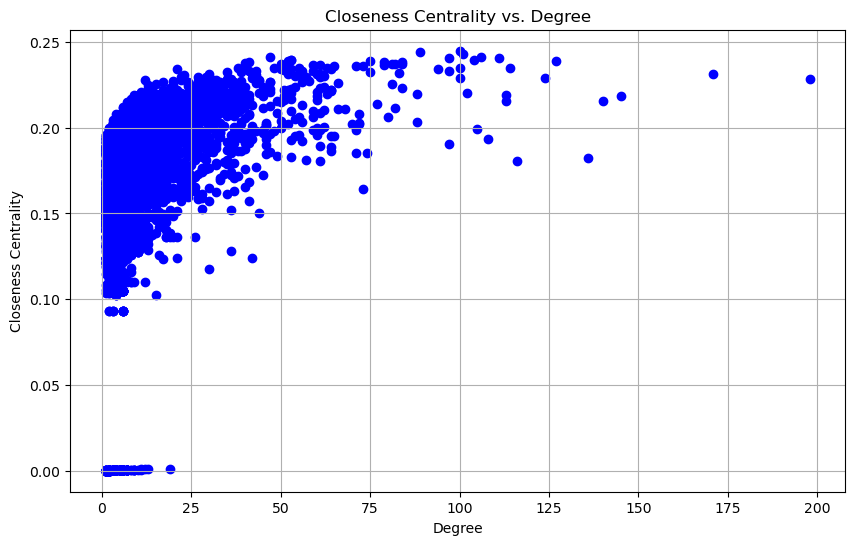

In [16]:
degrees = dict(G_real.degree())
closeness_values = list(closeness_centrality.values())
degree_values = list(degrees.values())

# Plotting closeness centrality of nodes vs their degree
plt.figure(figsize=(10, 6))
plt.scatter(degree_values, closeness_values, color='blue')
plt.title('Closeness Centrality vs. Degree')
plt.xlabel('Degree')
plt.ylabel('Closeness Centrality')
plt.grid(True)
plt.show()

##### Plot the closeness centrality of nodes vs their degree. Is there a correlation between the two? Did you expect that? Why?

The plot seems to show a general trend suggesting that nodes with higher degrees tend to have higher closeness centrality. Generally, we expected there to be a correlation between degree and closeness centrality. This is because the more direct connections a node has with other nodes, the more central the node is in the network - leading to a higher closeness centrality. 

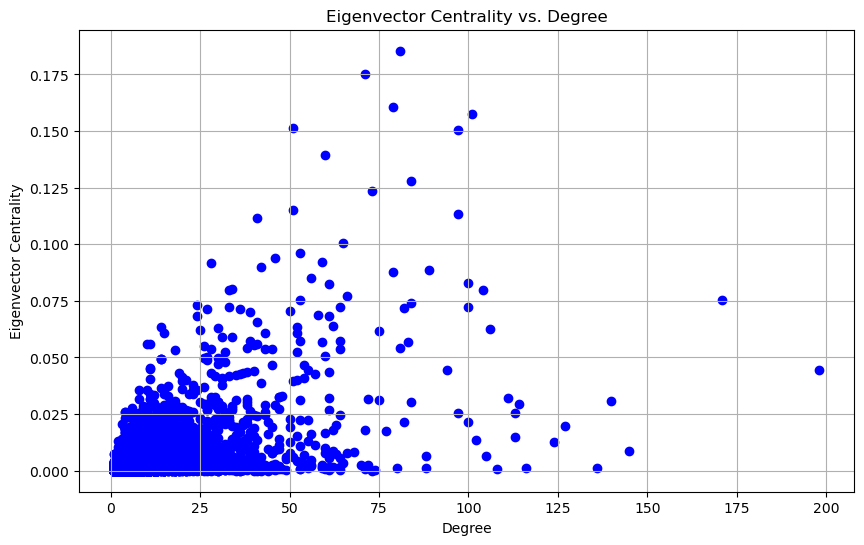

In [17]:
degrees = dict(G_real.degree())
closeness_values = list(eigenvector_centrality.values())
degree_values = list(degrees.values())

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(degree_values, closeness_values, color='blue')
plt.title('Eigenvector Centrality vs. Degree')
plt.xlabel('Degree')
plt.ylabel('Eigenvector Centrality')
plt.grid(True)
plt.show()

##### Repeat the two points above using eigenvector centrality instead. Do you observe any difference? Why?
In this plot, we still see that nodes with higher degrees generally tend to have higher eigenvector centrality, but the relationship has changed. For example, a node with a smaller degree can still achieve a high eigenvector score if it is connected to other nodes that are highly connected or have high eigenvector scores themselves. On the other hand, a node with a high degree connected mostly to nodes with low eigenvector scores will not necessarily have a high eigenvector centrality - this is why we see deviations from the overall trend. 

#### Part 3 - Words that characterize Computational Social Science communities

##### Exercise 1: TF-IDF and the Computational Social Science communities.

##### What does TF stand for?
TF stands for Term Frequency. This is a measure of how often a term occurs in a document. 

##### What does IDF stand for?
IDF stands for Inverse Document Frequency. This is a measure of how important a term is within a corpus of documents. 

In [21]:
import pandas as pd
from ast import literal_eval

# load assignment of authors to communities
with open('author_to_community_assignment.json', 'r') as file:
    author_to_com = json.load(file)

communities_df = pd.DataFrame(list(author_to_com.items()), columns=['author_id', 'community'])

# load tokenized abstracts
tokenized_abstracts =pd.read_csv('abstracts_tokenized.csv')

# load papers
papers = pd.read_csv('final_papers.csv')  

In [24]:
papers['author_ids'] = papers['author_ids'].apply(literal_eval) 
papers_exploded = papers.explode('author_ids')

authors_in_abstracts = set(communities_df['author_id'])
papers_in_abstracts = set(tokenized_abstracts['id'])

papers_exploded = papers_exploded[papers_exploded['author_ids'].isin(authors_in_abstracts)]
papers_exploded = papers_exploded[papers_exploded['id'].isin(papers_in_abstracts)]

papers_exploded['community'] = papers_exploded['author_ids'].apply(lambda x: author_to_com.get(x))

tokenized_abstracts['id'] = tokenized_abstracts['id'].astype(str)
papers_exploded['id'] = papers_exploded['id'].astype(str)

papers_with_abstracts = pd.merge(papers_exploded, tokenized_abstracts[['id', 'tokens']], on='id', how='inner')
papers_with_abstracts['tokens'] = papers_with_abstracts['tokens'].apply(literal_eval)
community_docs = papers_with_abstracts.groupby('community')['tokens'].apply(lambda tokens_lists: sum(tokens_lists, [])).reset_index()

ValueError: malformed node or string: ['https://openalex.org/A5091251187', 'https://openalex.org/A5003777693', 'https://openalex.org/A5071524745', 'https://openalex.org/A5023007469', 'https://openalex.org/A5024505700', 'https://openalex.org/A5044898565']

In [ ]:
from collections import Counter

# Calculating TF
def calculate_tf(tokens_list):
    tf_dict = Counter(tokens_list)
    total_count = len(tokens_list)
    for word in tf_dict:
        tf_dict[word] /= total_count
    return tf_dict

community_docs['tf'] = community_docs['tokens'].apply(calculate_tf)

# Find top 5 communities
author_counts_per_community = communities_df.groupby('community').size()
top_5_communities = author_counts_per_community.sort_values(ascending=False).head(5).index.tolist()
top_community_docs = community_docs[community_docs['community'].isin(top_5_communities)].copy()

# Get top 5 terms for top communities
top_community_docs['top_terms'] = top_community_docs['tf'].apply(lambda x: sorted(x.items(), key=lambda item: item[1], reverse=True)[:5])

for index, row in top_community_docs.iterrows():
    community = row['community']
    top_terms = row['top_terms']
    print(f"Community {community}:")
    for term, tf in top_terms:
        print(f" - {term}: {tf}")
    print("\n")

##### Describe similarities and differences between the communities.

By observing the top 5 terms for each community according to their TF values, we see that the top terms are similar across the 5 communities. Terms like "the", "of", "and", "to", and "a" are obviously used very often in the documents, and therefore have the greatest TF values out of all the unique tokens. 

##### Why aren't the TFs not necessarily a good description of the communities?

TFs are not always a good description of the communities as the metric only counts how often words appear in documents but does not account for the context or the significance of those words within the broader corpus. Additionally, as demonstrated before, frequently occuring words like "the", "and", "of" and "a" are common across all communities and are not very informative about the specific characteristics of individual communities. 

In [ ]:
#Calculating IDF
import numpy as np
doc_freq = Counter(word for tokens in top_community_docs['tokens'] for word in set(tokens))
N = len(top_community_docs)
idf_values = {word: np.log(N / doc_freq[word]) for word in doc_freq}

##### What base logarithm did you use? Is that important?

In this implementation, the natural logarithm with base e was used. The base used to calculate IDF affects the scale of the values, but it does not influence the relative differences between them. Hence, the base used is not important in terms of finding the terms with the highest IDF in a corpus. 

In [ ]:
from collections import defaultdict, Counter

# Find top 9 communities
author_counts_per_community = communities_df.groupby('community').size()
top_9_communities = author_counts_per_community.sort_values(ascending=False).head(9).index.tolist()
top_9_community_docs = community_docs[community_docs['community'].isin(top_9_communities)].copy()

# Calculate TF-IDF
def calculate_tfidf(tf_dict, idf_values):
    return {word: tf * idf_values.get(word, 0) for word, tf in tf_dict.items()}

top_9_community_docs['tfidf'] = top_9_community_docs['tf'].apply(lambda tf: calculate_tfidf(tf, idf_values))

aggregate_tf = defaultdict(Counter)
aggregate_tfidf = defaultdict(Counter)

# Aggregate scores
for _, row in top_9_community_docs.iterrows():
    aggregate_tf[row['community']].update(row['tf'])
    aggregate_tfidf[row['community']].update(row['tfidf'])

for community in top_9_communities:
    # Sort and select top 10 TF words
    top_tf_words = sorted(aggregate_tf[community].items(), key=lambda x: x[1], reverse=True)[:10]
    # Sort and select top 10 TF-IDF words
    top_tfidf_words = sorted(aggregate_tfidf[community].items(), key=lambda x: x[1], reverse=True)[:10]
    
    print(f"Community {community}:")
    print("Top 10 TF Words:")
    for word, score in top_tf_words:
        print(f"  {word}: {score}")
    print("\nTop 10 TF-IDF Words:")
    for word, score in top_tfidf_words:
        print(f"  {word}: {score}")
    print("\n----------\n")

In [ ]:
with open('social_scientists_network.json', 'r') as file:
    network_data = json.load(file)
G = nx.node_link_graph(network_data)
with open('author_to_community_assignment.json', 'r') as file:
    author_to_community = json.load(file)

#Find degrees and map to communities
author_degrees = dict(G.degree())
author_community_df = pd.DataFrame(author_to_community.items(), columns=['author_id', 'community'])
author_community_df['degree'] = author_community_df['author_id'].apply(lambda x: author_degrees.get(x, 0))
top_9_community_df = author_community_df[author_community_df['community'].isin(top_9_communities)]

#get author display names
author_names = pd.read_csv('final_authors.csv')
author_names.rename(columns={'id': 'author_id'}, inplace=True)
author_community_df = author_community_df.merge(author_names, on='author_id', how='left')

#get top 3
for community in top_9_communities:
    top_authors = author_community_df[author_community_df['community'] == community].nlargest(3, 'degree')
    print(f"Top 3 authors in Community {community}:")
    for index, row in top_authors.iterrows():
        author_name = row['display_name'] 
        print(f"  Author ID: {row['author_id']}, Name: {author_name}, Degree: {row['degree']}")
    print("\n")

##### Are these 10 words more descriptive of the community? If yes, what is it about IDF that makes the words more informative?
Yes, these words are much better at giving insight into the specific characteristics of each community. For example, it is now clear to see that community 12 deals with the topic of smoking alternatives, which was not clear from the TF-based words. The IDF component makes the TF-IDF words more informative by ensuring that the significance of the terms are not solely based on the number of occurences, but also by how rare they are in the broader corpus, which gives much more insight into unique characteristics of a community. 

##### Exercise 2: The Wordcloud.

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

for community in top_9_communities:
    top_tfidf_words = {word: score for word, score in sorted(aggregate_tfidf[community].items(), key=lambda item: item[1], reverse=True)[:]}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_tfidf_words)
    top_authors = author_community_df[author_community_df['community'] == community].nlargest(3, 'degree')
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    top_authors_names = top_authors['display_name'].tolist()
    
    plt.title(f"Community {community}\nTop Authors: {', '.join(top_authors_names)}")
    plt.show()

##### Exercise 3: Computational Social Science

##### Go back to Week 1, Exercise 1. Revise what you wrote on the topics in Computational Social Science. In light of your data-driven analysis, has your understanding of the field changed? How? (max 150 words)

Having conducted a thorough data-driven analysis on the field of CSS, it is evident that our understanding has improved significantly. In week 1, we understood that CSS involved analysing social networks and behaviours using computational methods, like using NLP on social media comments to investigate human interactions. However, having conducted this analysis to effectively investigate the field and its topics, it has become clear that CSS delves into the intricacies of social and human behaviour in much more detail that what we had first imagined. Many of the papers which we have dealt with in this analysis create interesting links between many different aspects, like social networks and online behaviour with biometrics and psychology - this is also why we have seen that many authors with different specialisations have collaborated on papers together (as shown in the social scientists network), since many aspects within the field are interlinked. 